In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from ta import *
import cse491H.load as load
import cse491H.preproc as preproc
import tensorflow as tf
from tensorflow import keras

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 3000)

In [4]:
# load the data
df = load.load_basic()
df = preproc.shifted_price_col(df,'NextClose',-1)
df.head()

,Date,Open,High,Low,Close,Volume,NextClose
0,2017-10-02,22423.470703,22559.380859,22416.000000,22557.599609,268530000,22641.669922
1,2017-10-03,22564.449219,22646.320313,22562.900391,22641.669922,238830000,22661.640625
2,2017-10-04,22645.669922,22685.939453,22632.800781,22661.640625,235730000,22775.390625
3,2017-10-05,22669.080078,22777.039063,22655.140625,22775.390625,246400000,22773.669922
4,2017-10-06,22762.029297,22773.669922,22730.849609,22773.669922,221450000,22761.070313


In [5]:
train, test = preproc.train_test(df)

In [6]:
# normalize 
train = train.drop("Date",axis=1)
test = test.drop("Date",axis=1)

scaler, train_scaled, test_scaled = preproc.scale(train,test)

train_scaled.head()

/Users/paulsoma/anaconda3/envs/cse491H/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,Open,High,Low,Close,Volume,NextClose
63,0.394249,0.331242,0.452042,0.418617,0.271758,0.450616
64,0.408275,0.360904,0.479171,0.450616,0.446213,0.500057
65,0.447321,0.423501,0.523728,0.500057,0.365501,0.571644
66,0.498534,0.497466,0.571852,0.571644,0.297234,0.567470
67,0.564566,0.502122,0.611776,0.567470,0.272150,0.600809


In [22]:
X_train = train_scaled.drop('NextClose', axis=1)
y_train = train_scaled['NextClose']

X_test = test_scaled.drop('NextClose', axis=1)
y_test = test_scaled['NextClose']

print(X_train.head())
print('\n')
print(y_train.head())

        Open      High       Low     Close    Volume
63  0.394249  0.331242  0.452042  0.418617  0.271758
64  0.408275  0.360904  0.479171  0.450616  0.446213
65  0.447321  0.423501  0.523728  0.500057  0.365501
66  0.498534  0.497466  0.571852  0.571644  0.297234
67  0.564566  0.502122  0.611776  0.567470  0.272150


63    0.450616
64    0.500057
65    0.571644
66    0.567470
67    0.600809
Name: NextClose, dtype: float64


In [11]:
def plot_history(history, metric, figname=None):
    
    plt.figure()
    
    train_mae = np.array(history.history[metric])
    val_mae = np.array(history.history['val_' + metric])
    
    
    train_label = 'Training '
    val_label = 'Validation '
    
    plt.plot(history.epoch, train_mae,
           label=train_label)
    plt.plot(history.epoch, val_mae,
           label = val_label)
    
    ymin = np.min([np.min(train_mae), np.min(val_mae), 0])
    ymax = np.max([np.max(train_mae), np.max(val_mae)])
   
    plt.ylim([ymin, ymax])
    
    plt.title(metric)
    plt.xlabel('Epoch')
    plt.ylabel(metric)
    
    plt.legend()
    
    if figname is not None:
        plt.savefig(figname)


def construct_model_1(input_shape):

    model = keras.Sequential([
        keras.layers.Dense(64, activation=tf.nn.relu,
                           input_shape=(input_shape,)),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(64, activation=tf.nn.relu),
        keras.layers.Dense(1)
    ])

    optimizer = tf.train.AdamOptimizer(0.001)

    model.compile(loss='mae',
                  optimizer=optimizer,
                  metrics=['mae','mse'])
    return model

def construct_model_2(input_shape):
    model = keras.Sequential([
        keras.layers.Dense(128, activation=tf.nn.relu,
                           input_shape=(input_shape,)),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(64, activation=tf.nn.relu),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(32, activation=tf.nn.relu),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(16, activation=tf.nn.relu),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(8, activation=tf.nn.relu),
        keras.layers.Dense(1)
    ])
    
    optimizer = tf.train.AdamOptimizer(0.001)
    
    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mse','mae'])
    return model



In [19]:
model = construct_model_2(X_train.shape[1])

EPOCHS = 1000

# callbacks
class PrintPct(keras.callbacks.Callback):    
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')


history = model.fit(X_train, y_train, epochs=EPOCHS,
                    validation_split=0.2, verbose=0,
                    callbacks=[PrintPct()])


.....................

........................

..................

.................

...................

.
.....................

....................

..........................

........................

.........
...............

........................

.........................

..........................

..........
...............

........................

..............................

.............................

..
..........................

...........

........................

............................

...........
.............

.......................

...........................

......................

...............
............

.......................

...........................

.........................

.............
..........

....................

.........................

.........................

....................
......

.....................

..............

............

...............

........................

........
....................

..........................

..............................

........................

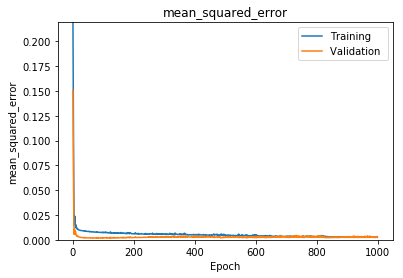

In [20]:
plot_history(history,'mean_squared_error','model_2_error_batch_norm')

In [23]:
metric_keys = model.metrics_names
test_metric_vals = model.evaluate(X_test, y_test, verbose=0)

test_metrics = dict(zip(metric_keys, test_metric_vals))
y_test_pred = model.predict(X_test)

In [24]:
# recombine test X and y to rescale with same scaler

Xy_test = X_test
Xy_test['NextClose'] = y_test_pred
Xy_test.head()

,Open,High,Low,Close,Volume,NextClose
209,0.616860,0.569592,0.625659,0.583951,0.233672,0.577433
210,0.546836,0.520625,0.574459,0.581467,0.221334,0.595520
211,0.582302,0.561616,0.640817,0.625709,0.117741,0.588826
212,0.608601,0.589137,0.659003,0.638551,0.117696,0.593244
213,0.647582,0.647407,0.714092,0.679651,0.119084,0.618104


In [25]:
# rescaled X_test
test_resc = scaler.inverse_transform(Xy_test)

cols = test.columns

test_resc = pd.DataFrame(test_resc, columns=cols, index=Xy_test.index)

usd_err = np.abs(test.NextClose - test_resc.NextClose)

In [26]:
def plot_prediction(actual, predicted, figname=None):
    """
    
    :param actual: actual next day closing price in USD
    :param predicted: predicted next day closing price in USd
    :return: 
    """
    plt.figure()
    
    plt.title('')
    
    xvals = range(actual.shape[0])
    
    plt.plot(xvals, actual,
           label='Actual')
    plt.plot(xvals, predicted,
           label = 'Predicted')
    
    ymin = np.min([np.min(actual), np.min(predicted)]) - 500
    ymax = np.max([np.max(actual), np.max(predicted)]) + 500
   
    plt.ylim([ymin, ymax])
    
    plt.title('Closing Price')
    plt.xlabel('t')
    plt.ylabel('$USD')
    
    plt.legend()
    
    if figname is not None:
        plt.savefig(figname)
    

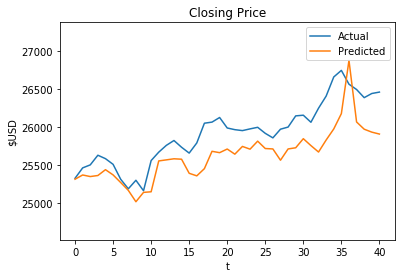

In [27]:
plot_prediction(test.NextClose, test_resc.NextClose, 
                figname='price_batch_norm')

In [23]:
a = None

if a is not None:
    print('1')

In [30]:
df.shape

(251, 7)

In [31]:
test.shape

(41, 6)

In [32]:
train.shape

(146, 6)

0.2808219178082192